#Data Understanding

##Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

##Load Dataset

In [2]:
url='https://drive.google.com/uc?id=1JnHqcZDejRC0Bdei0VlpeiHyf9PvG3cz'
house = pd.read_csv(url)
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Dataset House

Dataset ini diambil dari Url Github yaitu kc_house_data.csv. Dataset berisi informasi mengenai spesifikasi properti beserta harga.



##EDA

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Struktur Data

- Tidak ada missing Value
- Semua kolom bertipe Numeric (Kolom Date harusnya bertipe datetime)

### Insight

- Kita akan berfokus pada beberapa kolom variabel saja, sehingga variable yang tidak perlu akan di drop.


| Kolom           | Tipe    | Penjelasan                                                              |
| --------------- | ------- | ----------------------------------------------------------------------- |
| `id`            | int64   | ID unik tiap rumah                                                      |
| `date`          | object  | Tanggal penjualan rumah                                                 |
| `price`         | float64 | Harga jual rumah (ini yang akan diprediksi)                             |
| `bedrooms`      | int64   | Jumlah kamar tidur                                                      |
| `bathrooms`     | float64 | Jumlah kamar mandi (bisa desimal, misal 1.5 = 1 kamar mandi + 1 toilet) |
| `sqft_living`   | int64   | Luas bangunan utama dalam square feet (kaki persegi)                    |
| `sqft_lot`      | int64   | Luas tanah                                                              |
| `floors`        | float64 | Jumlah lantai rumah                                                     |
| `waterfront`    | int64   | 1 jika rumah menghadap air (danau/laut), 0 jika tidak                   |
| `view`          | int64   | Skor tampilan (0–4), makin tinggi makin bagus                           |
| `condition`     | int64   | Skor kondisi rumah (1–5), makin tinggi makin bagus                      |
| `grade`         | int64   | Skor kualitas konstruksi & desain (1–13)                                |
| `sqft_above`    | int64   | Luas bangunan di atas tanah (tanpa basement)                            |
| `sqft_basement` | int64   | Luas basement                                                           |
| `yr_built`      | int64   | Tahun rumah dibangun                                                    |
| `yr_renovated`  | int64   | Tahun rumah direnovasi (0 jika belum pernah direnovasi)                 |
| `zipcode`       | int64   | Kode pos                                                                |
| `lat`           | float64 | Koordinat lintang (latitude) rumah                                      |
| `long`          | float64 | Koordinat bujur (longitude) rumah                                       |
| `sqft_living15` | int64   | Luas bangunan rata-rata rumah tetangga dalam radius 15 rumah            |
| `sqft_lot15`    | int64   | Luas tanah rata-rata rumah tetangga dalam radius 15 rumah               |


### Perkecil Scope Variable Dataset

- Hal ini bertujuan untuk menyederhanakan model dan menghindari overfitting.

In [4]:
house = house.drop(['id', 'date', 'zipcode', 'view', 'lat', 'long', 'sqft_basement', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1)


In [5]:
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,1.0,0,3,7,1955,0
1,538000.0,3,2.25,2570,2.0,0,3,7,1951,1991
2,180000.0,2,1.00,770,1.0,0,3,6,1933,0
3,604000.0,4,3.00,1960,1.0,0,5,7,1965,0
4,510000.0,3,2.00,1680,1.0,0,3,8,1987,0


In [6]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,3.409430,7.656873,1971.005136,84.402258
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.650743,1.175459,29.373411,401.679240
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,1.000000,1900.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


#### Insight:

- Kolom bedrooms dan bathrooms memiliki data bernilai 0. Sedikit ambigu jika rumah tidak punya bedrooms dan bathrooms. Tapi bisa saja memang ada.

### Handling Missing Value

In [7]:
bedrooms = (house.bedrooms == 0).sum()
print(bedrooms)

13


Bedrooms yang bernilai 0 memiliki 13 baris.

In [8]:
house.loc[(house['bedrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
875,1095000.0,0,0.00,3064,3.5,0,3,7,1990,0
3119,380000.0,0,0.00,1470,3.0,0,3,8,2006,0
3467,288000.0,0,1.50,1430,3.0,0,3,7,1999,0
4868,228000.0,0,1.00,390,1.0,0,2,4,1953,0
6994,1295650.0,0,0.00,4810,2.0,0,3,12,1990,0
8477,339950.0,0,2.50,2290,2.0,0,3,8,1985,0
8484,240000.0,0,2.50,1810,2.0,0,3,7,2003,0
9773,355000.0,0,0.00,2460,2.0,0,3,8,1990,0
9854,235000.0,0,0.00,1470,2.0,0,3,7,1996,0
12653,320000.0,0,2.50,1490,2.0,0,3,7,1999,0


Dari hasil ini bisa dilihat memang anomali karena grade rumah termasuk mayoritas tinggi. Sehingga data ini akan dibuang/drop

In [9]:
# Drop baris dengan nilai 'Bedrooms' = 0
house = house.loc[(house[['bedrooms']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
house.shape

(21600, 10)

In [10]:
bathrooms = (house.bathrooms == 0).sum()
print(bathrooms)

3


Bathrooms yang bernilai 0 memiliki 3 baris

In [11]:
house.loc[(house['bathrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
1149,75000.0,1,0.0,670,1.0,0,3,3,1966,0
5832,280000.0,1,0.0,600,1.0,0,2,3,1950,0
10481,484000.0,1,0.0,690,1.0,0,4,7,1948,0


Dari hasil ini bisa dilihat meskipun bathrooms, tetapi masih ada bedrooms. Jika dilihat dari yr_built kisaran 1948-1966 yang dimana termasuk sudah tua dengan grade yang normal.

- Dapat disimpulkan data ini termasuk norma, sehingga tetap akan digunakan

### Handling Outliers

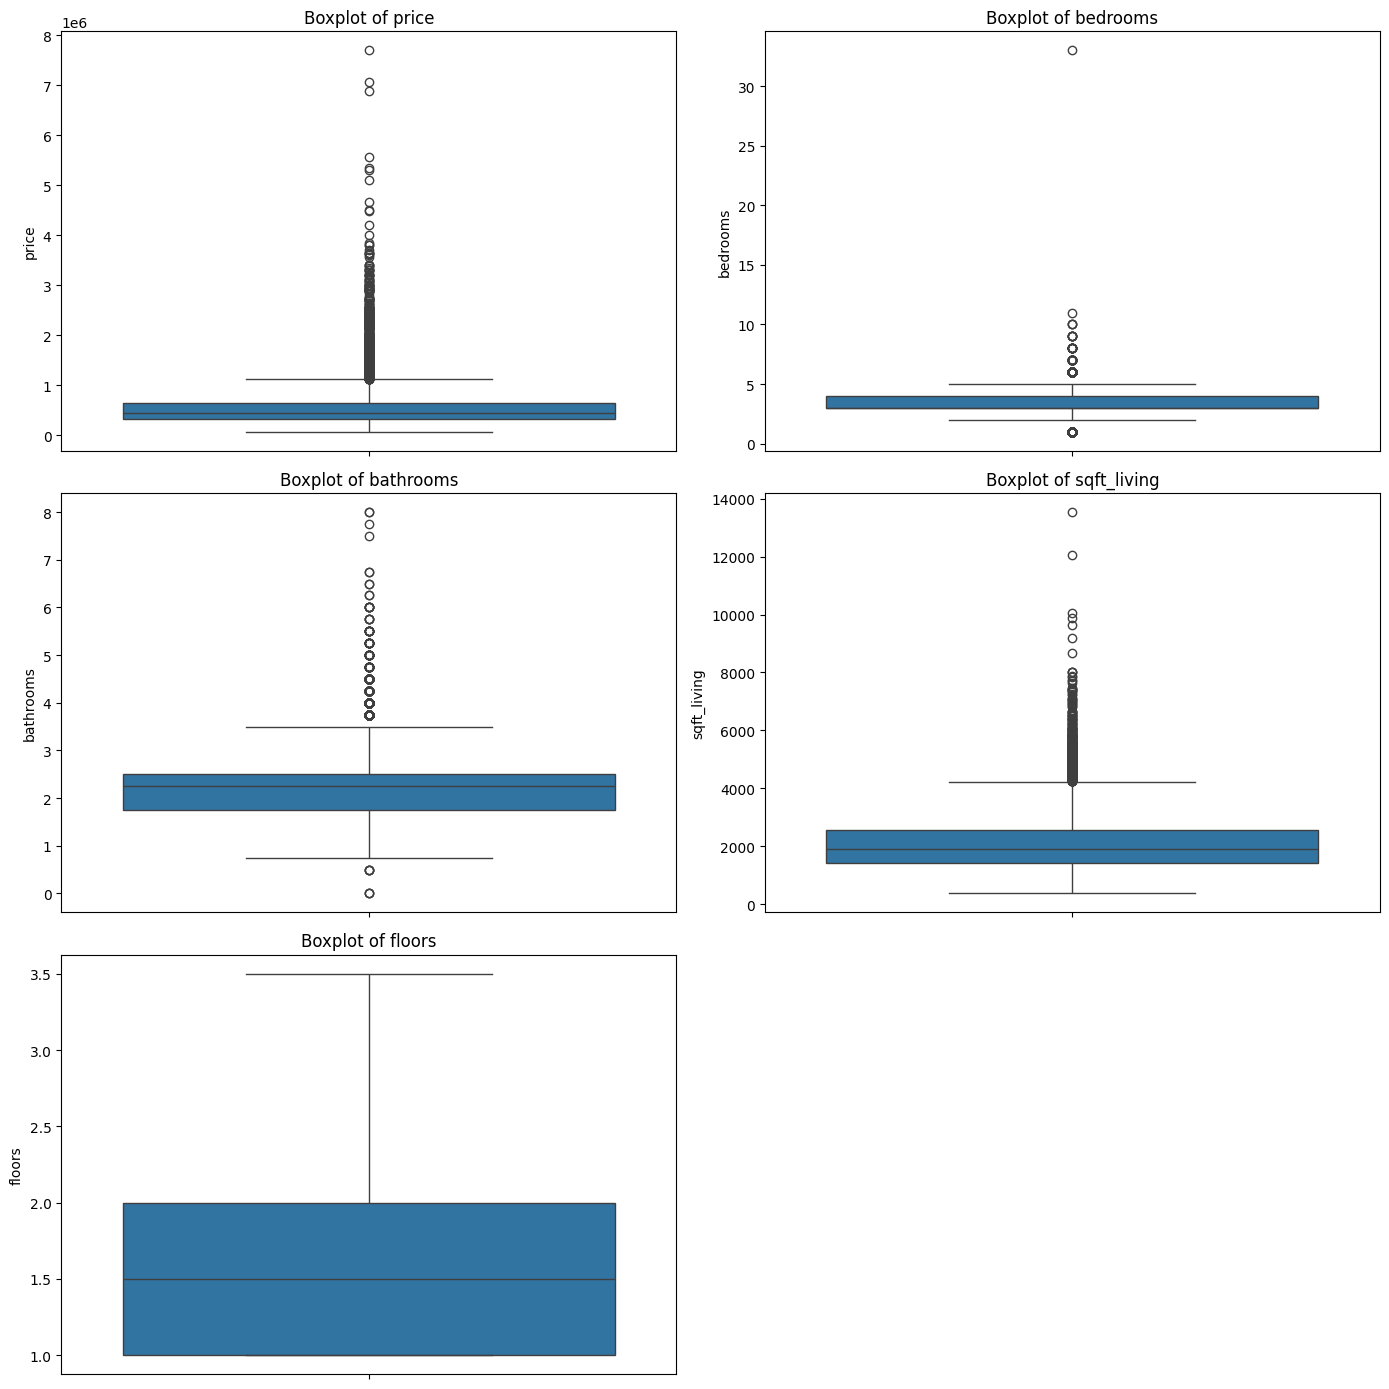

In [12]:
numerical_cols = ['price','bedrooms','bathrooms','sqft_living','floors']

plt.figure(figsize=(14, 14))  # lebih lebar
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=house[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Penjelasan BoxPlot:

1. bathrooms
Boxplot: Terlihat banyak outlier di atas (hingga 8 kamar mandi). Rumah dengan lebih dari 4–5 kamar mandi itu jarang dan bisa dikategorikan outlier.

2. sqft_living
Boxplot: Outlier ekstrem sangat banyak di sisi atas (hingga >13.000 sqft). Rumah dengan luas >8000 sqft adalah mansion dan sangat tidak umum, bisa mendistorsi model.

3. floors
Boxplot: Hampir tidak ada outlier. Rentang antara 1 hingga 3.5 lantai, distribusinya cukup stabil.

4.  bedrooms
Boxplot: Outlier bisa terjadi untuk rumah dengan 33 kamar tidur.

5. price
Boxplot: Harga memang ada outliers. Mungkin karena ada rumah mahal/mansion

In [13]:
def winsorize_iqr_df(house, columns):
    house_winsorized = house.copy()  # salin dataframe supaya data asli aman

    for col in columns:
        Q1 = house[col].quantile(0.25)
        Q3 = house[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        house_winsorized[col] = np.where(
            house[col] < lower_bound, lower_bound,
            np.where(house[col] > upper_bound, upper_bound, house[col])
        )
    return house_winsorized

# Misalnya kolom yang mau di-winsorize:
num_cols = ['bathrooms', 'sqft_living', 'bedrooms']

# Terapkan winsorization ke dataframe house
house_winsorized = winsorize_iqr_df(house, num_cols)



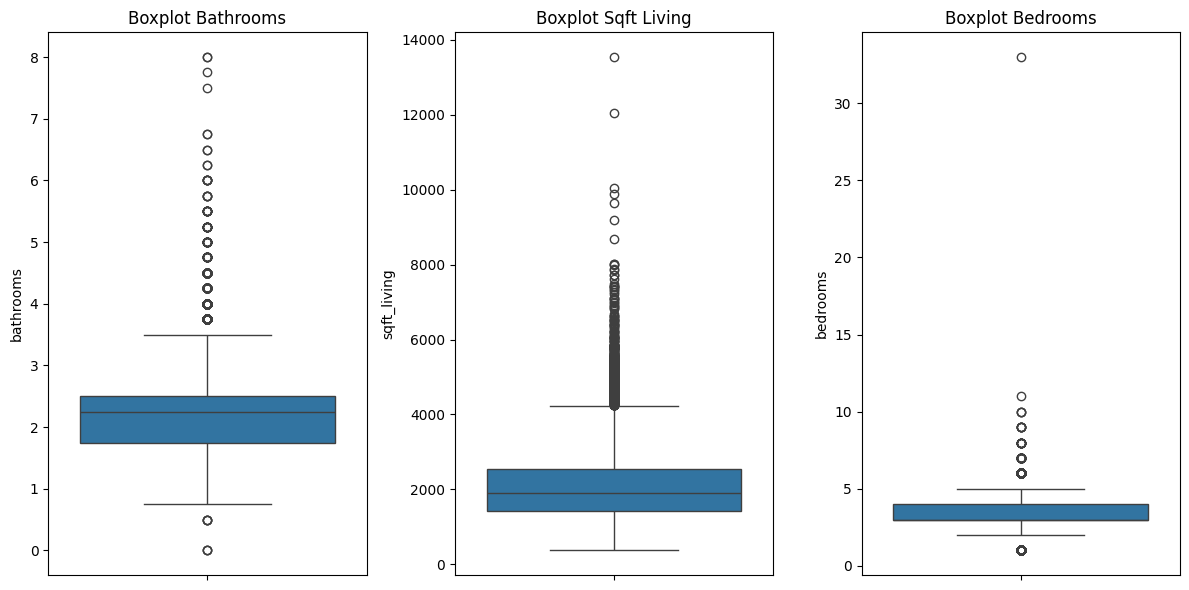

In [14]:
# Buat boxplot untuk kolom 'bathrooms', 'sqft_living', dan 'bedrooms'
plt.figure(figsize=(12, 6))

# Boxplot bathrooms
plt.subplot(1, 3, 1)
sns.boxplot(y=house['bathrooms'])
plt.title('Boxplot Bathrooms')

# Boxplot sqft_living
plt.subplot(1, 3, 2)
sns.boxplot(y=house['sqft_living'])
plt.title('Boxplot Sqft Living')

# Boxplot bedrooms
plt.subplot(1, 3, 3)
sns.boxplot(y=house['bedrooms'])
plt.title('Boxplot Bedrooms')

plt.tight_layout()
plt.show()

In [15]:
house_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21600 non-null  float64
 1   bedrooms      21600 non-null  float64
 2   bathrooms     21600 non-null  float64
 3   sqft_living   21600 non-null  float64
 4   floors        21600 non-null  float64
 5   waterfront    21600 non-null  int64  
 6   condition     21600 non-null  int64  
 7   grade         21600 non-null  int64  
 8   yr_built      21600 non-null  int64  
 9   yr_renovated  21600 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [16]:
house_winsorized.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,5.401667e+05,3.363912,2.099039,2058.226777,1.494028,0.007546,3.409769,7.657454,1970.997407,84.453056
std,3.671263e+05,0.853138,0.721633,838.843089,0.539677,0.086543,0.650590,1.173983,29.373978,401.794764
min,7.500000e+04,1.500000,0.625000,370.000000,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1429.250000,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,5.500000,3.625000,4231.125000,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


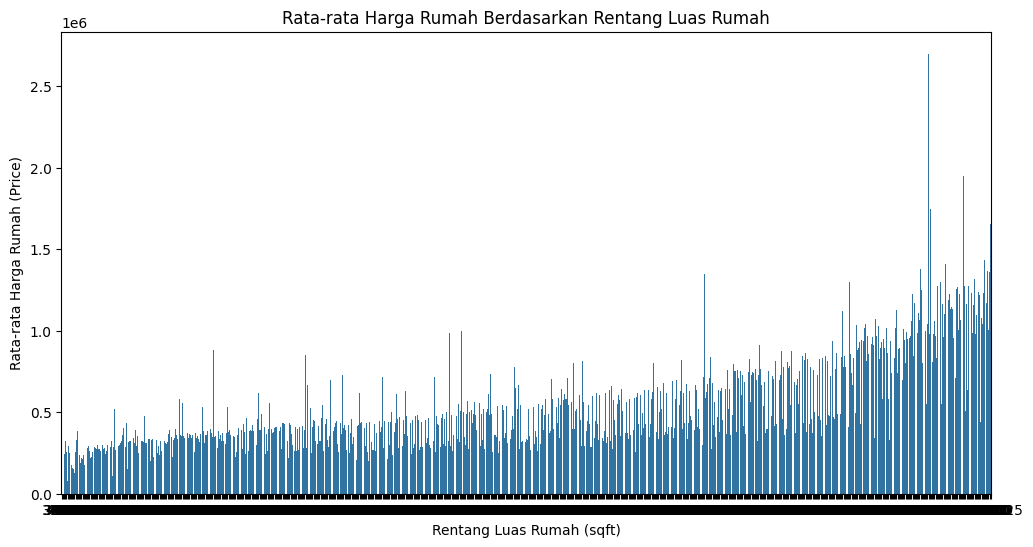

In [17]:
# Membuat kategori bins untuk sqft_living

# Agregasi rata-rata harga berdasarkan kategori luas rumah
df_agg = house_winsorized.groupby('sqft_living').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
plt.title("Rata-rata Harga Rumah Berdasarkan Rentang Luas Rumah")
sns.barplot(x='sqft_living', y='price', data=df_agg)
plt.xlabel("Rentang Luas Rumah (sqft)")
plt.ylabel("Rata-rata Harga Rumah (Price)")
plt.show()

Berdasarkan hasil visualisasi, berikut adalah beberapa insight yang bisa didapatkan:

- Distribusi Harga Jual Berdasarkan Luas Rumah: Bar chart menunjukkan harga jual ('selling_price') untuk berbagai kategori luas rumah ('sqft_living'). Sumbu X adalah luas rumah dan sumbu Y adalah harga jual.

- Kategori dengan Harga Jual Terendah: Range 0-1000

- Kategori dengan Harga Jual Tertinggi: Range 4001+

- Tren Peningkatan Harga Jual: Terlihat jelas ada tren peningkatan harga jual dari kiri ke kanan.


### Multivariate Analysis

In [18]:
# Kolom numerik
numerical_cols = house_winsorized.select_dtypes(include=['int64', 'float64']).columns

print("Fitur numerik:", list(numerical_cols))


Fitur numerik: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated']


#### Numerical Features

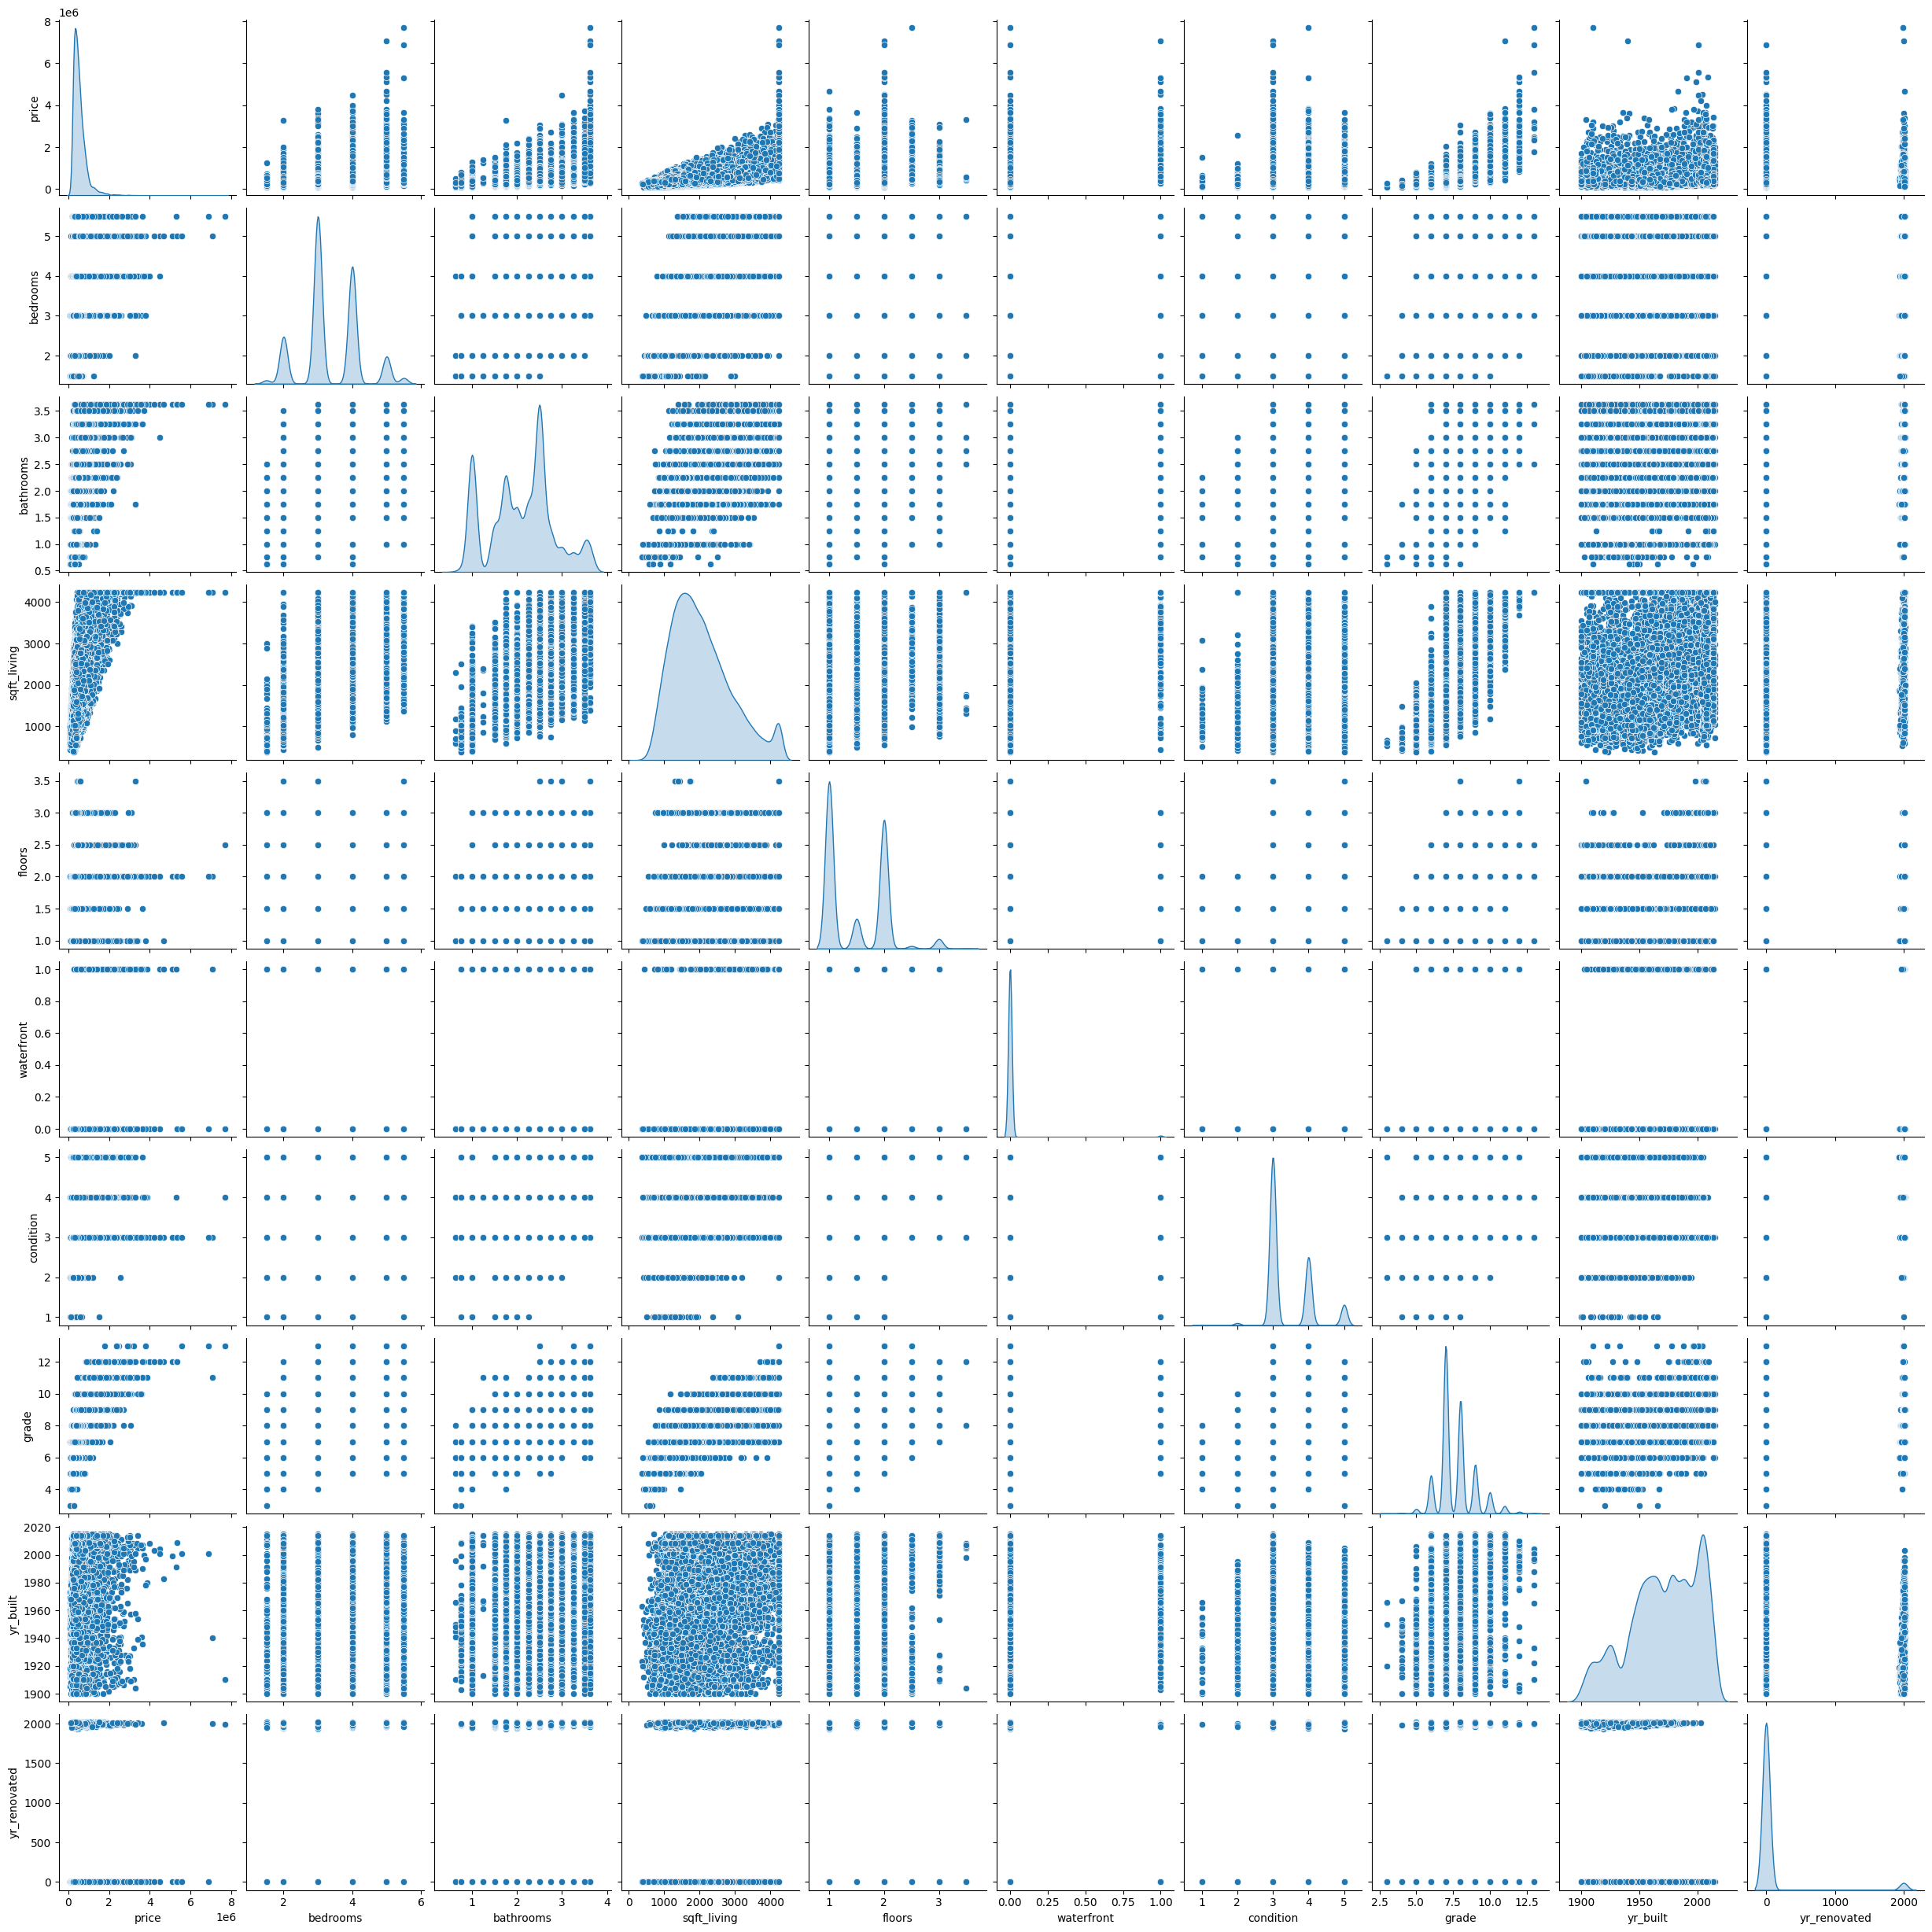

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house_winsorized, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

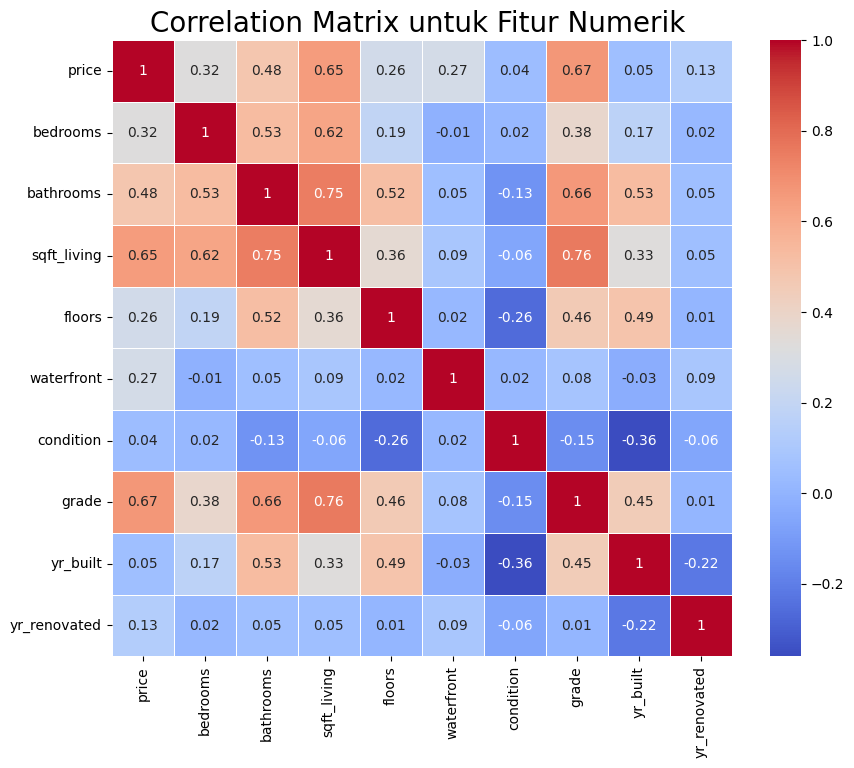

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_winsorized[numerical_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Penjelasan Correlation Matrix:

🔺 grade (0.67) dan sqft_living (0.65) punya korelasi paling kuat dengan price → makin tinggi kualitas & luas rumah, makin mahal harganya.

🛁 bathrooms (0.48) dan 🛏️ bedrooms (0.32) juga cukup berpengaruh terhadap price, tapi tidak sekuat grade.

🚫 condition (0.04) dan yr_built (0.05) hampir tidak berkorelasi dengan price → usia atau kondisi rumah tidak terlalu memengaruhi harga.

💡 Korelasi antar fitur juga terlihat kuat antara:

- bathrooms & sqft_living (0.75)

- grade & sqft_living (0.76)

#Data Preparation

In [21]:
house = house_winsorized.copy()

Setelah proses Winsorization selesai, dataset yang telah dibersihkan disimpan kembali ke variabel utama, yaitu house. Hal ini bertujuan agar proses preprocessing selanjutnya tetap menggunakan data yang sudah bebas dari nilai ekstrem.

## Reduksi Dimensi dengan PCA

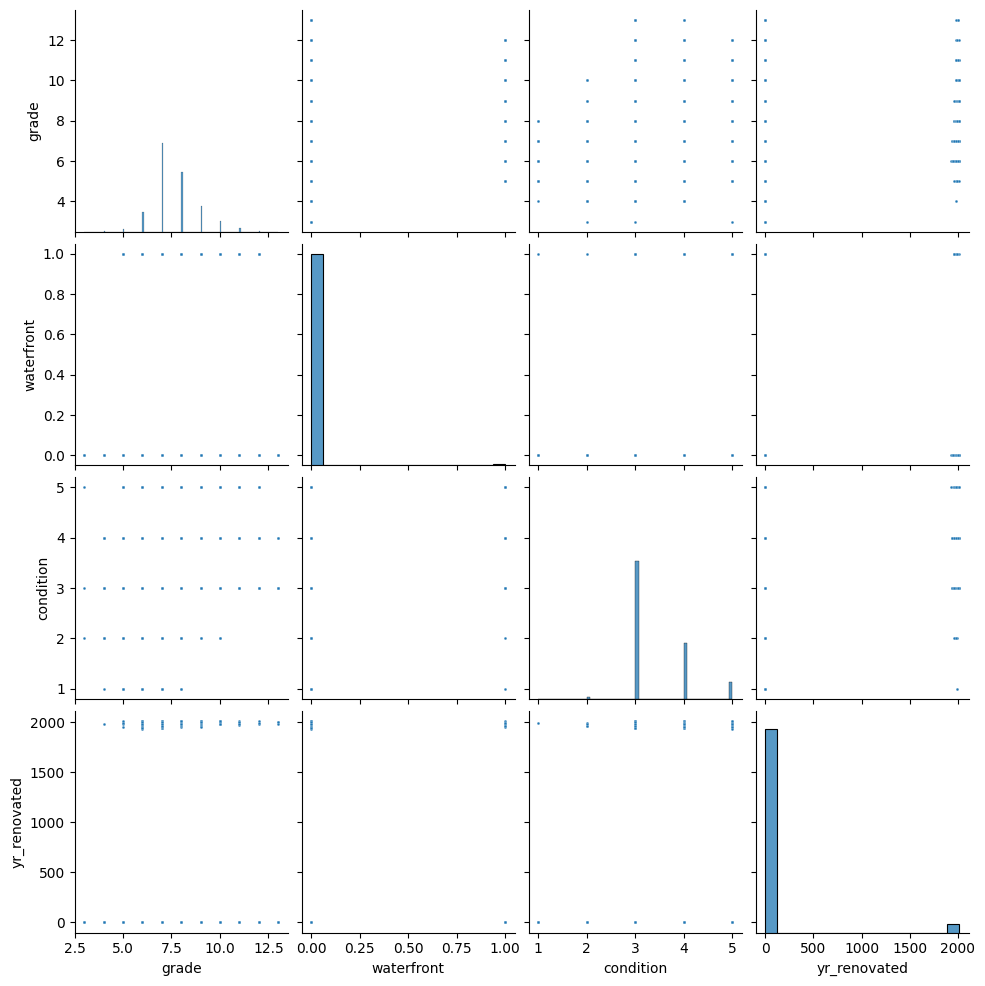

In [22]:
sns.pairplot(house[['grade','waterfront','condition','yr_renovated']], plot_kws={"s": 4});

In [26]:

pca = PCA(n_components=2, random_state=123)
pca.fit(house[['waterfront','condition']])
princ_comp = pca.transform(house[['waterfront','condition',]])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.983, 0.017])

In [33]:
pca = PCA(n_components=1, random_state=123)
pca.fit(house[['waterfront','condition']])
house['dimension'] = pca.transform(house.loc[:, ('waterfront','condition')]).flatten()
house.drop(['waterfront','condition'], axis=1, inplace=True)

##Train Test Split

In [34]:
X = house.drop(["price"],axis =1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Split Data:

Training 90 : Test 10



In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 21600
Total # of sample in train dataset: 19440
Total # of sample in test dataset: 2160


##Standarisasi Numeric

In [36]:
scaler = StandardScaler()

numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built','grade','yr_renovated']
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bedrooms,bathrooms,sqft_living,floors,yr_built,grade,yr_renovated
2051,-0.426624,0.558681,-0.320223,0.939736,0.920999,0.293566,-0.212108
13753,-0.426624,-0.828544,-0.665972,-0.913332,0.307777,-0.559996,-0.212108
12884,0.746689,0.905488,2.590171,0.939736,0.852863,2.854251,-0.212108
18293,-1.599936,-1.522157,-1.309779,-0.913332,-0.543921,-0.559996,-0.212108
13667,-0.426624,0.558681,1.408517,0.939736,1.023203,0.293566,-0.212108


In [37]:
X_train[numerical_features].describe()

,bedrooms,bathrooms,sqft_living,floors,yr_built,grade,yr_renovated
count,1.944000e+04,1.944000e+04,1.944000e+04,1.944000e+04,1.944000e+04,1.944000e+04,1.944000e+04
mean,5.592234e-17,2.138207e-16,2.379441e-16,6.359796e-17,1.978116e-15,-1.184238e-16,-8.132498e-18
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.186593e+00,-2.042367e+00,-2.013197e+00,-9.133321e-01,-2.417657e+00,-3.974244e+00,-2.121082e-01
25%,-4.266236e-01,-4.817380e-01,-7.494281e-01,-9.133321e-01,-6.801931e-01,-5.599963e-01,-2.121082e-01
50%,-4.266236e-01,2.118748e-01,-1.771552e-01,1.320216e-02,1.374371e-01,-5.599963e-01,-2.121082e-01
75%,7.466893e-01,5.586812e-01,5.858752e-01,9.397364e-01,8.869314e-01,2.935656e-01,-2.121082e-01
max,2.506659e+00,2.119310e+00,2.590171e+00,3.719339e+00,1.500154e+00,4.561375e+00,4.761450e+00


#Model Deployment

In [38]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


Analisis Model akan menggunakan tiga jenis model, yaitu:

KNN, RandomForest, Boosting

##KNN

In [39]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Random Forest

In [40]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##Metode Adaptive Boosting

In [41]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Scaling Pada Data Uji

In [42]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-42-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.29574651 -0.95273649  0.7165918  ... -1.29341573 -1.46375536
 -0.50985348]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-42-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5599963  -1.41355816 -0.5599963  ... -1.41355816 -2.26712003
 -0.5599963 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
<ipython-input-42-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.21210822 -0.21210822 -0.21210822 ... 

#Evaluasi Model

In [43]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,38878125.74376,52181390.331025
RF,12739643.756096,45505005.591461
Boosting,52262035.460483,57150908.633416


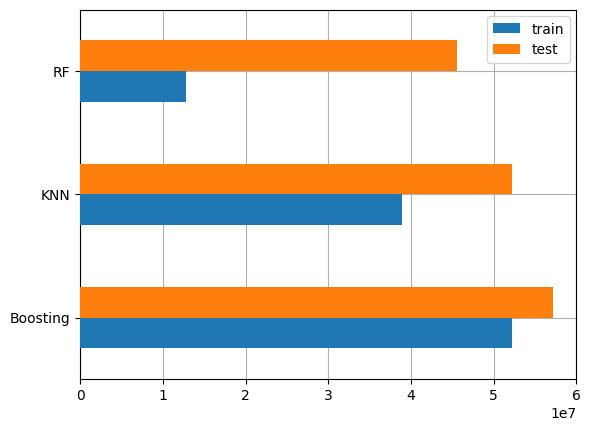

In [44]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Penjelasan:

- Boosting	~5.4	~4.4	Overfitting terlihat → error train & test cukup besar tapi tidak seimbang. Boosting cenderung fit terlalu dalam ke data latih.
- KNN	~0.26	~0.22	Cukup stabil → train dan test error mirip → model tidak overfit atau underfit.
- RF	~0.04	~0.2	Sangat baik → performa sangat bagus di train dan cukup baik di test. Hampir tidak overfit.



##Uji Data

In [45]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
21585,270000.0,334973.2,324502.9,383839.9


Evaluasi Akurasi Prediksi:

Hasil Asli = 270000
- KNN	334973 	 ->	Cukup dekat
- RandomForest	324502.9	 ->	Paling dekat
- Boosting	383839.0	 ->	Cukup jauh dari aslinya

###Kesimpulan:
- Semua model cukup baik kali ini, terutama Random Forest yang prediksinya hampir identik dengan nilai sebenarnya.

- Model Boosting cenderung underestimate (meremehkan nilai).

- KNN juga cukup akurat, hanya sedikit lebih tinggi.